imports

In [2]:
import os
import random
import pickle

import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import InceptionV3

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from io import BytesIO
from ipywidgets import widgets

inspecting the dataset

In [3]:
BASE_DIR = 'train'

bengal_dir = os.path.join(BASE_DIR, 'bengal')
chausie_dir = os.path.join(BASE_DIR, 'chausie')
korat_dir = os.path.join(BASE_DIR, 'korat')
persian_dir = os.path.join(BASE_DIR,'persian')
scottish_fold_dir = os.path.join(BASE_DIR,'scottish_fold')

print(f'total training bengal cat images: {len(os.listdir(bengal_dir))}')
print(f'total training chausie cat images: {len(os.listdir(chausie_dir))}')
print(f'total training korat cat images: {len(os.listdir(korat_dir))}')
print(f'total training persian cat images: {len(os.listdir(persian_dir))}')
print(f'total training scottish fold cat images: {len(os.listdir(scottish_fold_dir))}')


bengal_files = os.listdir(bengal_dir)
chausie_files = os.listdir(chausie_dir)
korat_files = os.listdir(korat_dir)
persian_files = os.listdir(persian_dir)
scottish_fold_files = os.listdir(scottish_fold_dir)

total training bengal cat images: 151
total training chausie cat images: 160
total training korat cat images: 122
total training persian cat images: 150
total training scottish fold cat images: 148


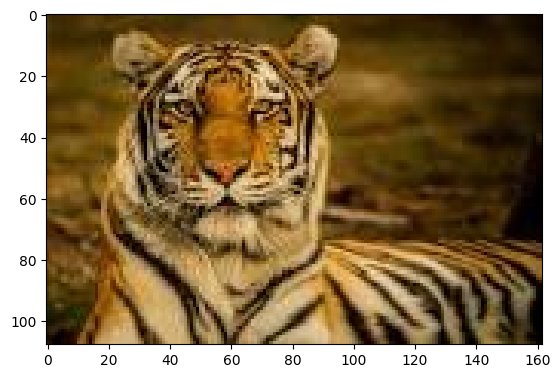

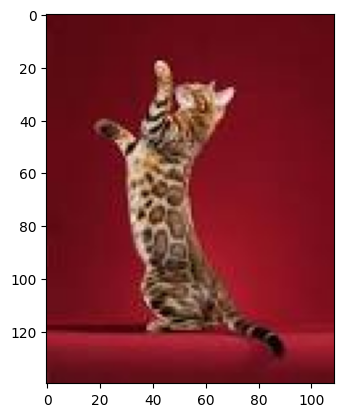

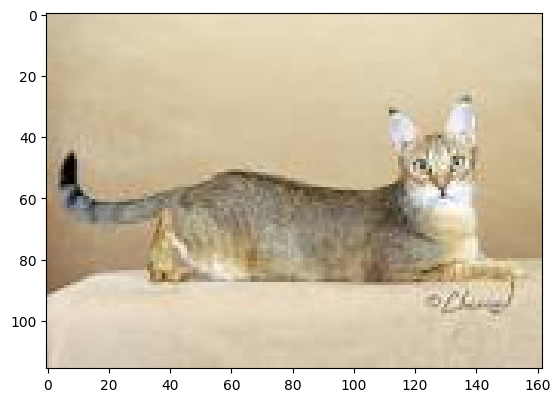

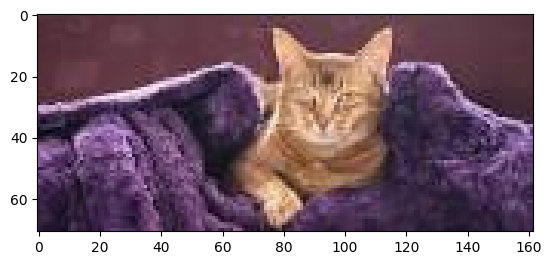

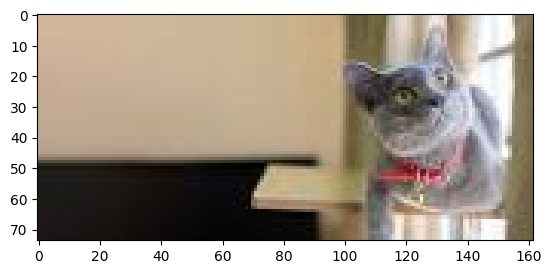

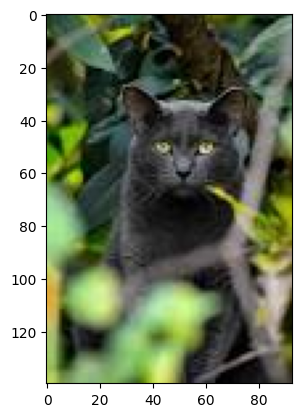

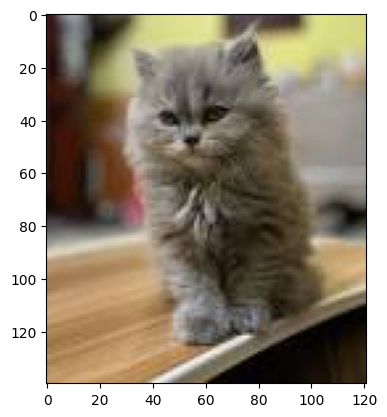

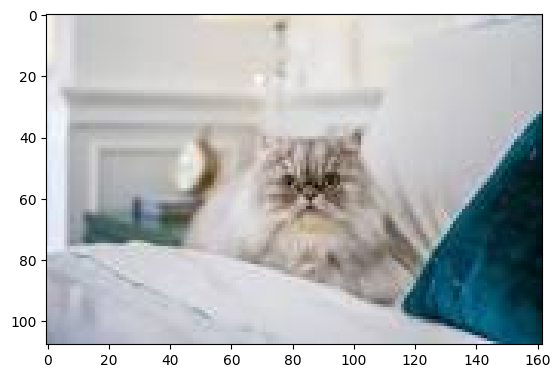

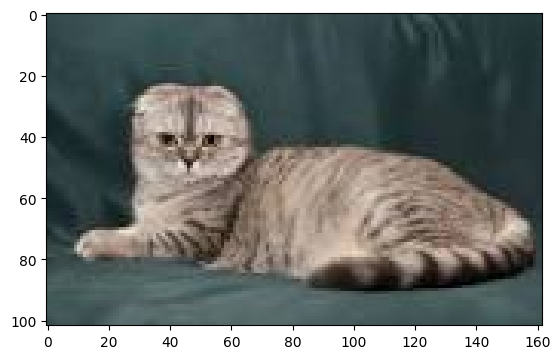

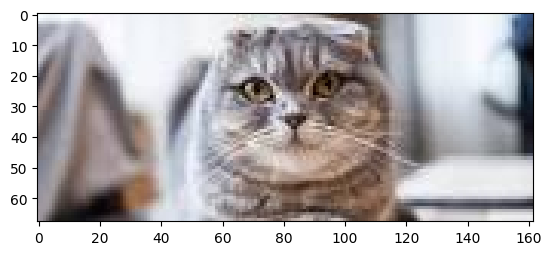

In [4]:
next_bengal = [os.path.join(bengal_dir, fname)
             for fname in random.sample(bengal_files, k=2)]
next_chausie = [os.path.join(chausie_dir, fname)
              for fname in random.sample(chausie_files, k=2)]
next_korat = [os.path.join(korat_dir, fname)
                 for fname in random.sample(korat_files, k=2)]
next_persian = [os.path.join(persian_dir, fname)
             for fname in random.sample(persian_files, k=2)]
next_scottish_fold = [os.path.join(scottish_fold_dir, fname)
             for fname in random.sample(scottish_fold_files, k=2)]

for i, img_path in enumerate(next_bengal+next_chausie+next_korat+next_persian+next_scottish_fold):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

constructing the model

In [5]:
def create_pre_trained_model():
  
    pre_trained_model = tf.keras.applications.inception_v3.InceptionV3( 
        include_top=False, 
        input_shape=(150,150,3),
        weights='imagenet'
    ) 

    for layer in pre_trained_model.layers:
        layer.trainable = False

    return pre_trained_model

In [6]:
pre_trained_model = create_pre_trained_model()

num_total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {num_total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

I0000 00:00:1753962807.779095    6116 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5103 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [7]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

using DNN in our pre-trained model

In [8]:
def output_of_last_layer(pre_trained_model):
    
    last_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_layer.output
    print('last layer output shape: ', last_output.shape)
    
    return last_output

In [9]:
last_output = pre_trained_model.get_layer('mixed7').output

final model

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomTranslation(0.15,0.15),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.15)
])

In [11]:
def create_final_model(pre_trained_model, last_output, num_classes=42):

    inputs = tf.keras.Input(shape=(150, 150, 3))
    x = data_augmentation(inputs)
    x = tf.keras.applications.inception_v3.preprocess_input(x)

    feature_extractor = tf.keras.Model(pre_trained_model.input, last_output)
    x = feature_extractor(x, training=False)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [12]:
model = create_final_model(pre_trained_model, last_output)

total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,554,506 total parameters in this model.
There are 38,579,242 trainable parameters in this model.


pre-processing images

In [13]:
VAL_DIR = 'val'

In [14]:
def train_val_datasets():

    training_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=BASE_DIR,
        batch_size=32,
        image_size=(150,150),
        shuffle=True, 
        seed=42
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VAL_DIR,
        batch_size=32,
        image_size=(150,150),
        shuffle=False, 
        seed=42
    ) 
                                                                        
    return training_dataset, validation_dataset

In [15]:
training_dataset, validation_dataset = train_val_datasets()

Found 5695 files belonging to 42 classes.
Found 1451 files belonging to 42 classes.


In [16]:
val_batches = int(validation_dataset.cardinality())
test_size = val_batches // 5 

test_dataset = validation_dataset.take(test_size)
validation_dataset = validation_dataset.skip(test_size)

print(f'Number of validation batches: {validation_dataset.cardinality()}')
print(f'Number of test batches: {test_dataset.cardinality()}')

Number of validation batches: 37
Number of test batches: 9


In [17]:
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

training_dataset = training_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [18]:
class EarlyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') >= .90:
            self.model.stop_training = True

actual training

In [19]:
history = model.fit(
    training_dataset,
    epochs=50,
    validation_data = validation_dataset,
    callbacks = [EarlyCallback()],
    verbose = 2
)

Epoch 1/50


I0000 00:00:1753962858.966850    6192 cuda_dnn.cc:529] Loaded cuDNN version 91002


178/178 - 15s - 87ms/step - accuracy: 0.0320 - loss: 3.8061 - val_accuracy: 0.0310 - val_loss: 3.7479
Epoch 2/50
178/178 - 7s - 40ms/step - accuracy: 0.0348 - loss: 3.7615 - val_accuracy: 0.0275 - val_loss: 3.7274
Epoch 3/50
178/178 - 7s - 39ms/step - accuracy: 0.0356 - loss: 3.7395 - val_accuracy: 0.0327 - val_loss: 3.7021
Epoch 4/50
178/178 - 7s - 38ms/step - accuracy: 0.0374 - loss: 3.7229 - val_accuracy: 0.0258 - val_loss: 3.7205
Epoch 5/50
178/178 - 7s - 38ms/step - accuracy: 0.0379 - loss: 3.7172 - val_accuracy: 0.0361 - val_loss: 3.7201
Epoch 6/50
178/178 - 7s - 40ms/step - accuracy: 0.0406 - loss: 3.7117 - val_accuracy: 0.0447 - val_loss: 3.7051
Epoch 7/50
178/178 - 7s - 39ms/step - accuracy: 0.0411 - loss: 3.7064 - val_accuracy: 0.0404 - val_loss: 3.6920
Epoch 8/50
178/178 - 7s - 38ms/step - accuracy: 0.0421 - loss: 3.7018 - val_accuracy: 0.0396 - val_loss: 3.7017
Epoch 9/50
178/178 - 7s - 39ms/step - accuracy: 0.0386 - loss: 3.6921 - val_accuracy: 0.0430 - val_loss: 3.6882
Ep

KeyboardInterrupt: 